## KNN

How the algorithm works

**We calculate the Euclidean distance between a new sample and all points.**

**We determine the label of the sample based on the majority vote.**

## Key Points

### Euclidean Distance

Euclidean distance is defined as the distance between two points, and is given by:

$$
d(\mathbf{x}, \mathbf{y})
= \sqrt{\sum_{i=0}^{m-1} (x_i - y_i)^2}
$$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv("../data/iris.csv")
df.drop('Id',inplace=True,axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


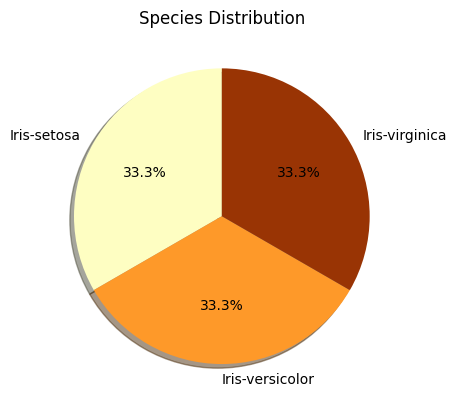

In [4]:
df["Species"].value_counts().plot.pie(autopct='%1.1f%%', colors=["#fefec2", "#fe9929", "#993404"], 
                                       startangle=90, shadow=True)
plt.title("Species Distribution")
plt.ylabel("")
plt.show()


## From this plot we conclude that:

**The Data is perfectly balanced**

C:\Users\szymwid\AppData\Local\Temp\ipykernel_15544\3895764316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="SepalLengthCm", palette="YlOrBr")


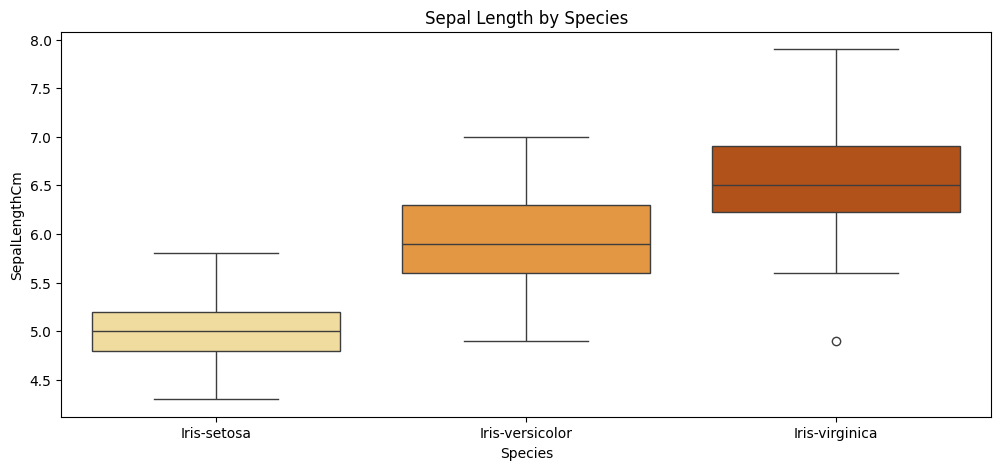

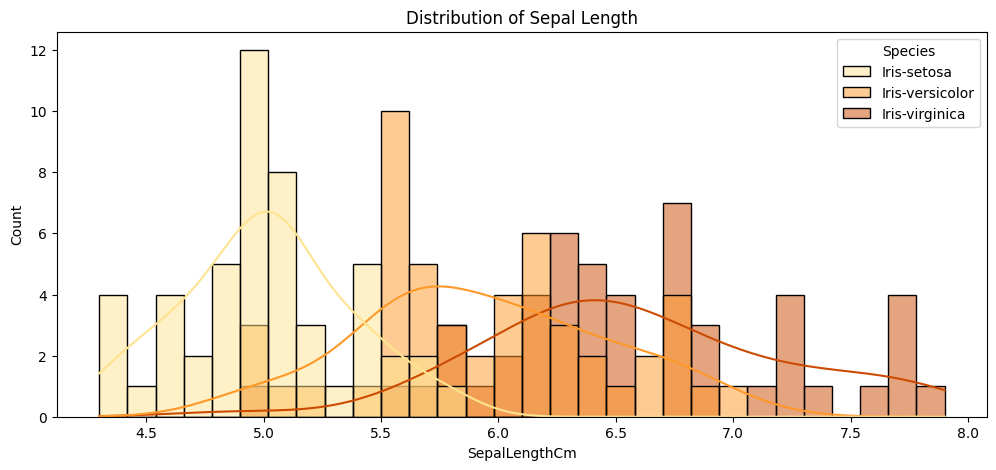

In [7]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Species", y="SepalLengthCm", palette="YlOrBr")
plt.title("Sepal Length by Species")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(data=df, x="SepalLengthCm", hue="Species", kde=True, palette="YlOrBr", bins=30)
plt.title("Distribution of Sepal Length")
plt.show()


C:\Users\szymwid\AppData\Local\Temp\ipykernel_15544\1507486252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="SepalWidthCm", palette="YlOrBr")


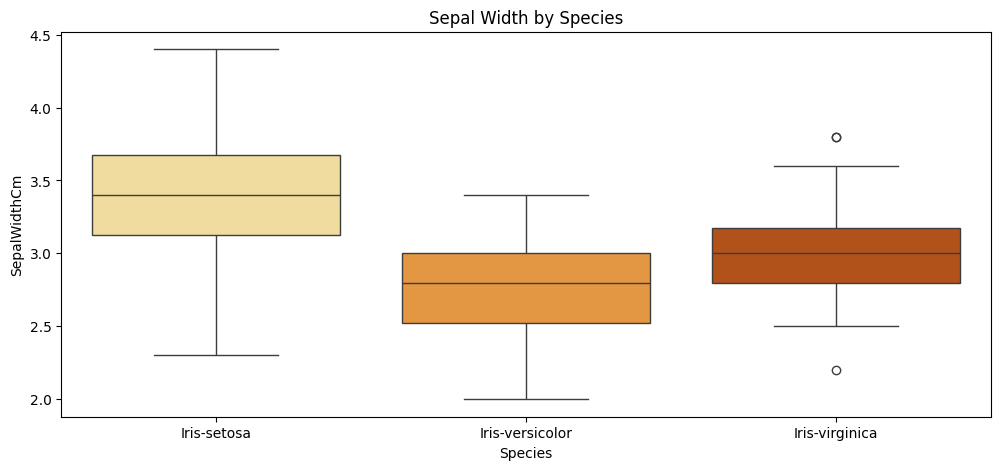

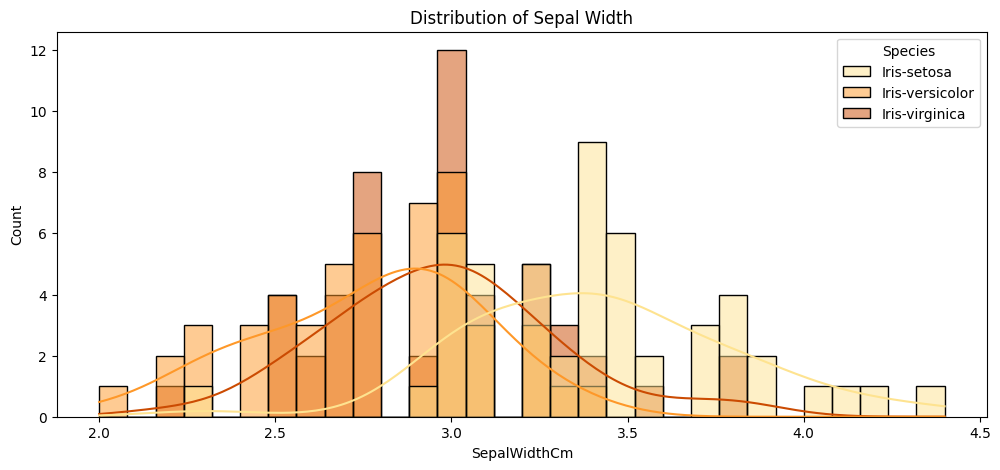

In [8]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Species", y="SepalWidthCm", palette="YlOrBr")
plt.title("Sepal Width by Species")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(data=df, x="SepalWidthCm", hue="Species", kde=True, palette="YlOrBr", bins=30)
plt.title("Distribution of Sepal Width")
plt.show()


### From these plots we conclude that:

* **Setosa has much smaller SepalLength than the other 2 classes**

* **Virginca has the highest SepalLength, however It seems hard to distingush between Virginca and Versicolor using SepalLength as the difference is less clear**

* **We can see that Virginica contains an outlier**

C:\Users\szymwid\AppData\Local\Temp\ipykernel_15544\419158889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="PetalLengthCm", palette="YlOrBr")


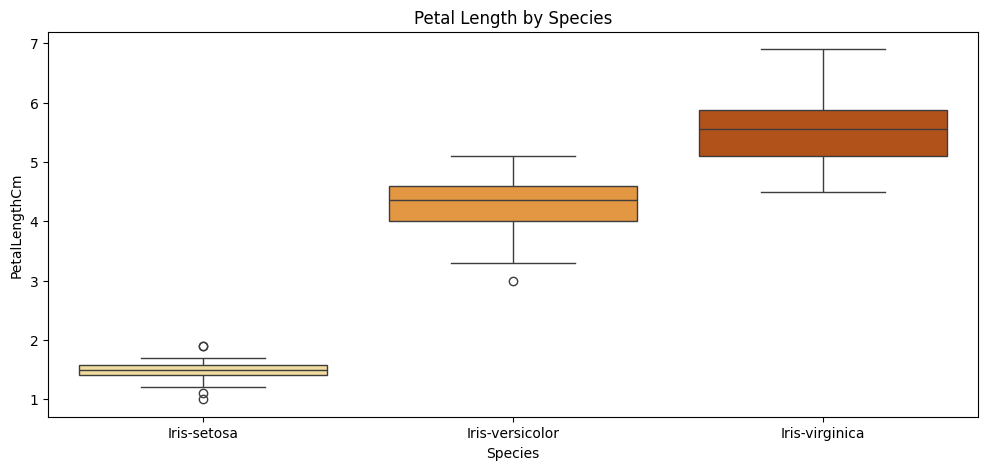

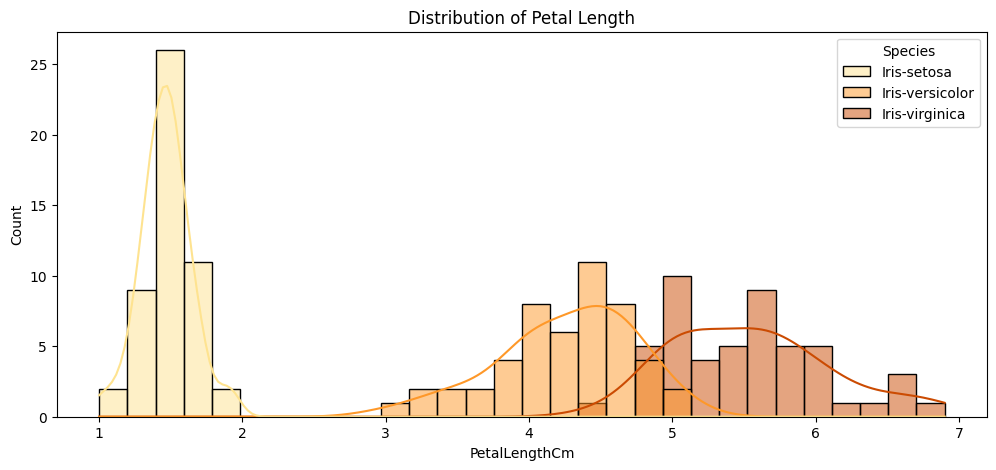

In [9]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Species", y="PetalLengthCm", palette="YlOrBr")
plt.title("Petal Length by Species")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(data=df, x="PetalLengthCm", hue="Species", kde=True, palette="YlOrBr", bins=30)
plt.title("Distribution of Petal Length")
plt.show()


C:\Users\szymwid\AppData\Local\Temp\ipykernel_15544\1349253572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Species", y="PetalWidthCm", palette="YlOrBr")


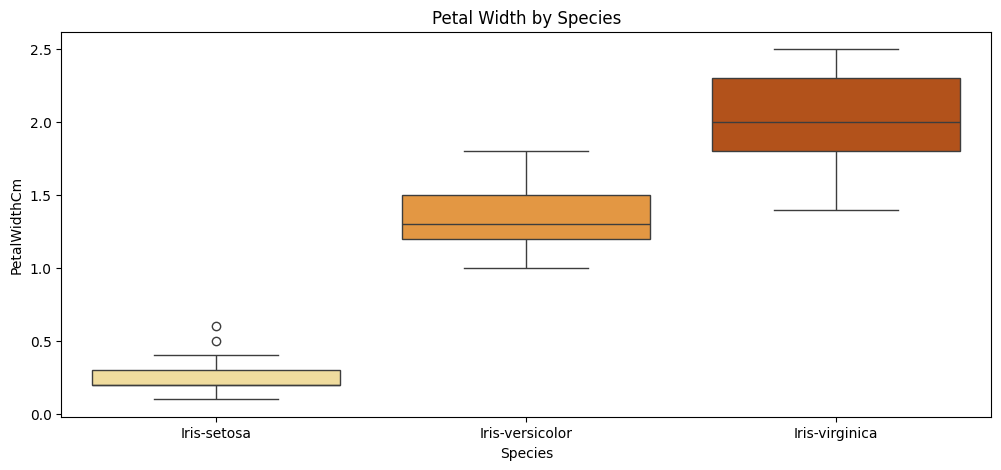

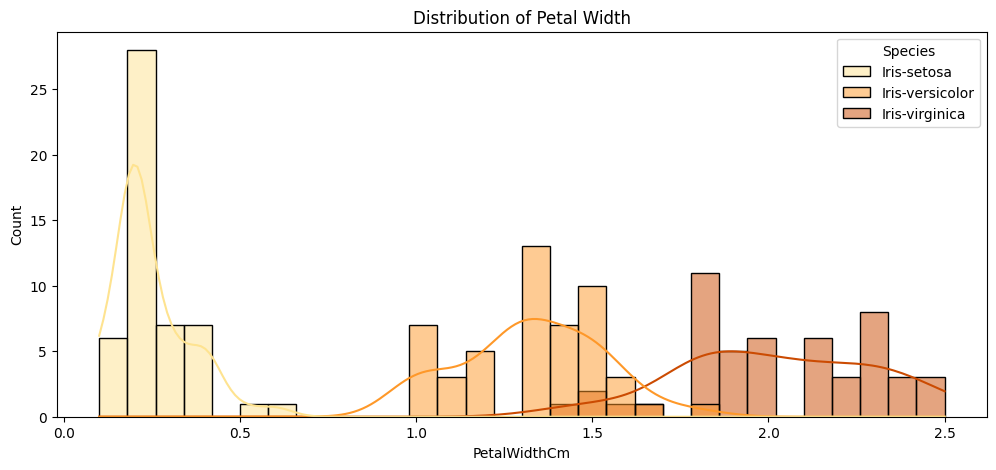

In [10]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Species", y="PetalWidthCm", palette="YlOrBr")
plt.title("Petal Width by Species")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(data=df, x="PetalWidthCm", hue="Species", kde=True, palette="YlOrBr", bins=30)
plt.title("Distribution of Petal Width")
plt.show()


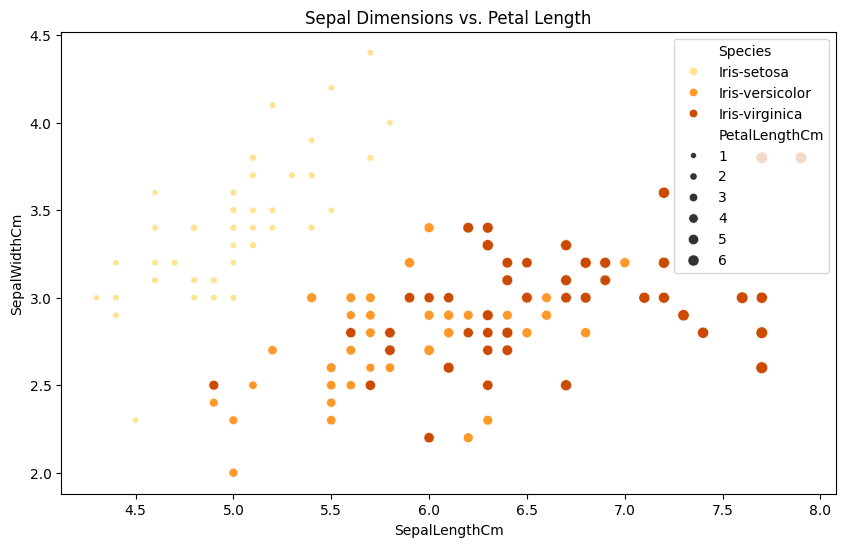

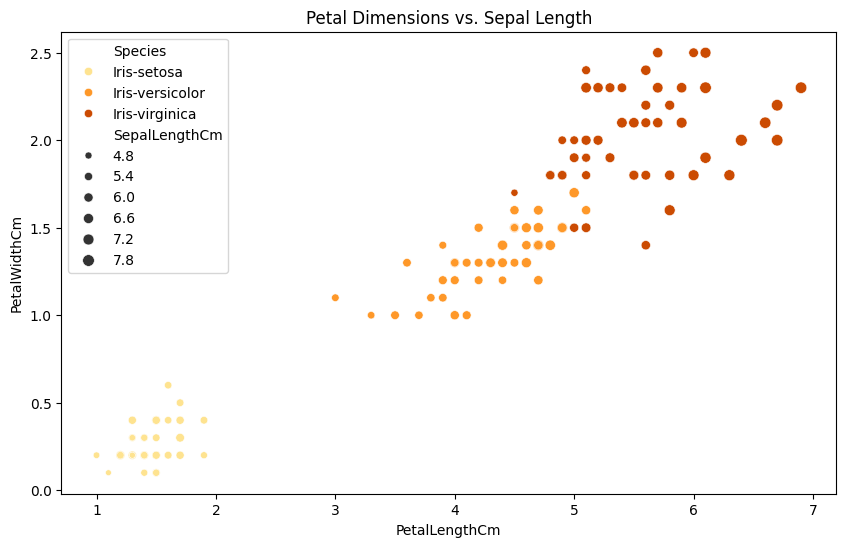

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species", size="PetalLengthCm", palette="YlOrBr")
plt.title("Sepal Dimensions vs. Petal Length")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species", size="SepalLengthCm", palette="YlOrBr")
plt.title("Petal Dimensions vs. Sepal Length")
plt.show()


### Conclusions:

- **Setosa** species have noticeably smaller petals and sepals compared to the other two species.
- **Virginica** and **Versicolor** tend to overlap in terms of sepal length and width, making them harder to distinguish based on those features alone.
- **PetalLengthCm** and **PetalWidthCm** appear to be the most discriminative features for classification.
- **SepalWidthCm** shows the least separation between species and might be less useful on its own.


<a id="4"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '

# Data Preprocessing

In [4]:
X = df.iloc[:, :-1]
y = df["Species"]

print(df["Species"].value_counts())


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [5]:
from mlfs.preprocessing import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state=42)

<a id="4"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '

# Comparing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as SklearnKNN
from mlfs.knn import KNN as CustomKNN 
import time
import numpy as np
import pandas as pd

def benchmark_knn_custom_vs_sklearn(X, y, n_repeats=5, n_neighbors=5):
    """
    Benchmarks training and prediction times for custom and sklearn KNN implementations.

    Parameters
    ----------
    X : np.ndarray or pd.DataFrame
        Feature matrix.
    y : np.ndarray or pd.Series
        Target vector.
    n_repeats : int
        Number of times to repeat the measurement (for averaging).
    n_neighbors : int
        Number of neighbors to use in KNN.

    Returns
    -------
    pd.DataFrame
        DataFrame with average fit and predict times for both models.
    """

    custom_fit_times = []
    custom_predict_times = []
    sklearn_fit_times = []
    sklearn_predict_times = []

    for _ in range(n_repeats):
        # Custom KNN
        model_custom = CustomKNN(n_neighbors=n_neighbors)

        start = time.time()
        model_custom.fit(X, y)
        custom_fit_times.append(time.time() - start)

        start = time.time()
        model_custom.predict(X)
        custom_predict_times.append(time.time() - start)

        # sklearn KNN
        model_sklearn = SklearnKNN(n_neighbors=n_neighbors)

        start = time.time()
        model_sklearn.fit(X, y)
        sklearn_fit_times.append(time.time() - start)

        start = time.time()
        model_sklearn.predict(X)
        sklearn_predict_times.append(time.time() - start)

    results = pd.DataFrame({
        'Model': ['CustomKNN', 'SklearnKNN'],
        'FitTime': [np.mean(custom_fit_times), np.mean(sklearn_fit_times)],
        'PredictTime': [np.mean(custom_predict_times), np.mean(sklearn_predict_times)]
    })

    return results


In [7]:
results = benchmark_knn_custom_vs_sklearn(X_train, y_train, n_repeats=5, n_neighbors=5)
print(results)

        Model   FitTime  PredictTime
0   CustomKNN  0.000001     0.094640
1  SklearnKNN  0.001095     0.001866


In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier as SklearnKNN
from mlfs.knn import KNN as CustomKNN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time


def benchmark_knn_scalability_vs_sklearn(sample_sizes, n_features=4, n_classes=3, n_neighbors=5):
    """
    Benchmarks and compares fit/predict times of custom and sklearn KNN as dataset size increases.

    Parameters
    ----------
    sample_sizes : list[int]
        List of dataset sizes to test.
    n_features : int
        Number of features per sample.
    n_classes : int
        Number of output classes.
    n_neighbors : int
        Number of neighbors for KNN.

    Returns
    -------
    pd.DataFrame
        DataFrame with all benchmark results.
    """

    records = []

    for n_samples in sample_sizes:
        X, y = make_classification(
            n_samples=n_samples,
            n_features=n_features,
            n_informative=n_features,
            n_redundant=0,
            n_repeated=0,
            n_classes=n_classes,
            random_state=42
        )

        custom_model = CustomKNN(n_neighbors=n_neighbors)

        start = time.time()
        custom_model.fit(X, y)
        fit_custom = time.time() - start

        start = time.time()
        custom_model.predict(X)
        predict_custom = time.time() - start

        records.append({
            "Samples": n_samples,
            "Model": "CustomKNN",
            "FitTime": fit_custom,
            "PredictTime": predict_custom
        })

        sklearn_model = SklearnKNN(n_neighbors=n_neighbors)

        start = time.time()
        sklearn_model.fit(X, y)
        fit_sklearn = time.time() - start

        start = time.time()
        sklearn_model.predict(X)
        predict_sklearn = time.time() - start

        records.append({
            "Samples": n_samples,
            "Model": "SklearnKNN",
            "FitTime": fit_sklearn,
            "PredictTime": predict_sklearn
        })

    df = pd.DataFrame(records)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    sns.lineplot(data=df, x="Samples", y="FitTime", hue="Model", marker="o", ax=axs[0])
    axs[0].set_title("Fit Time vs Sample Size")
    axs[0].set_ylabel("Time (s)")
    axs[0].grid(True)

    sns.lineplot(data=df, x="Samples", y="PredictTime", hue="Model", marker="o", ax=axs[1])
    axs[1].set_title("Predict Time vs Sample Size")
    axs[1].set_ylabel("Time (s)")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

    return df


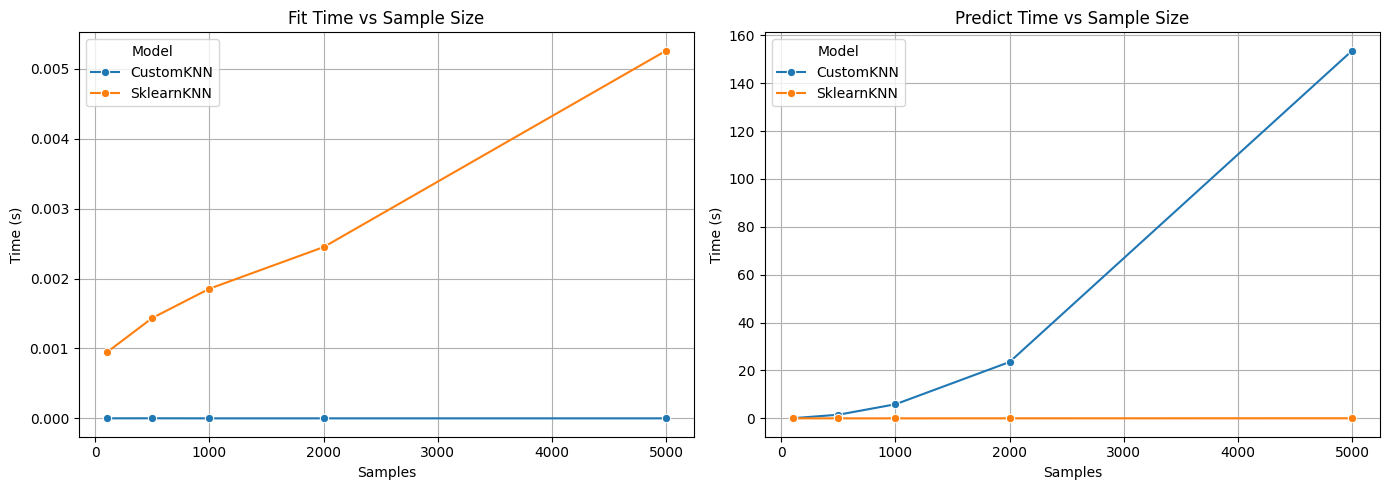

   Samples       Model       FitTime  PredictTime
0      100   CustomKNN  9.536743e-07     0.062338
1      100  SklearnKNN  9.441376e-04     0.001791
2      500   CustomKNN  1.430511e-06     1.515403
3      500  SklearnKNN  1.437664e-03     0.002607
4     1000   CustomKNN  4.768372e-07     5.882137
5     1000  SklearnKNN  1.855850e-03     0.005119
6     2000   CustomKNN  4.768372e-07    23.538189
7     2000  SklearnKNN  2.451181e-03     0.011061
8     5000   CustomKNN  4.768372e-07   153.538526
9     5000  SklearnKNN  5.261660e-03     0.029448


In [ ]:
sample_sizes = [100, 500, 1000, 2000, 5000]
df_results = benchmark_knn_scalability_vs_sklearn(sample_sizes)
print(df_results)


### 🔍 Performance Comparison: Custom KNN vs Scikit-learn

To evaluate the efficiency and scalability of my own K-Nearest Neighbors (KNN) implementation, I conducted a benchmark against `scikit-learn`'s highly optimized `KNeighborsClassifier`. The comparison included both training (`fit`) and prediction (`predict`) times across datasets of increasing size.

#### 📊 Observations:

- **Training time (fit)** for both models remained very low, as expected for lazy learners like KNN. My custom implementation was extremely fast here, primarily because it performs a simple reference assignment without additional validation or preprocessing.

- **Prediction time (predict)** showed a clear divergence:
  - The custom KNN implementation exhibited significantly longer prediction times as the dataset grew — scaling roughly **quadratically**.
  - Scikit-learn's version scaled **much more efficiently**, likely due to its use of optimized Cython code and vectorized distance computations.

#### ⚙️ Technical Insight:

- My implementation uses a basic loop-based approach with manual Euclidean distance calculations and full array sorting via `argsort`.
- Scikit-learn leverages optimized data structures (e.g. KD-Trees, Ball Trees) and fast low-level operations, which makes it far more efficient for large-scale datasets.

#### ✅ Takeaway:

This benchmark highlights the **trade-off between educational clarity and production-level performance**. While my custom KNN was implemented to fully understand the algorithm's inner workings, the scikit-learn version is clearly more suitable for real-world applications involving larger datasets.

> ⚠️ Still, building the algorithm from scratch provided valuable insight into the mechanics of instance-based learning and performance bottlenecks — an essential step in mastering machine learning fundamentals.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as SklearnKNN
from mlfs.knn import KNN as CustomKNN
from mlfs.metrics import accuracy as custom_accuracy
from mlfs.metrics import balanced_accuracy as custom_balanced_accuracy
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import pandas as pd


def compare_knn_accuracy_basic(X_train, X_test, y_train, y_test, n_neighbors=5):
    """
    Compares CustomKNN and SklearnKNN using only:
    - Custom metrics for CustomKNN
    - Sklearn metrics for SklearnKNN

    Returns
    -------
    pd.DataFrame
        Comparison of accuracy and balanced accuracy.
    """

    custom_model = CustomKNN(n_neighbors=n_neighbors)
    custom_model.fit(X_train, y_train)
    preds_custom = custom_model.predict(X_test)

    acc_custom = custom_accuracy(y_test, preds_custom)
    balacc_custom = custom_balanced_accuracy(y_test, preds_custom)

    sklearn_model = SklearnKNN(n_neighbors=n_neighbors)
    sklearn_model.fit(X_train, y_train)
    preds_sklearn = sklearn_model.predict(X_test)

    acc_sklearn = accuracy_score(y_test, preds_sklearn)
    balacc_sklearn = balanced_accuracy_score(y_test, preds_sklearn)

    results = pd.DataFrame({
        "Model": ["CustomKNN", "SklearnKNN"],
        "Accuracy": [acc_custom, acc_sklearn],
        "Balanced Accuracy": [balacc_custom, balacc_sklearn]
    })

    return results


In [23]:
results = compare_knn_accuracy_basic(X_train, X_test, y_train, y_test)
print(results)


        Model  Accuracy  Balanced Accuracy
0   CustomKNN  0.966667           0.972710
1  SklearnKNN  0.966667           0.962963
